# CAR SALE ML Project
__Keni Legesse__ <br>
Data Scientist

### PROJECT OBJECTIVE

- Perform Data Cleaning: Apply data cleaning techniques to address inconsistencies, missing values, and outliers in the car dataset. This may involve methods such as imputation, deletion, and outlier detection to ensure the integrity and accuracy of the data. <br><br>

- Explore Probability Description Functions (PDFs): Use PDFs such as histograms, box plots, and density plots to gain insights into the distribution of data, identify potential issues with the data, and determine the need for data transformation or normalization.<br><br>

- Check for Linearity: Evaluate the linearity assumption by plotting scatter plots and assessing the relationship between the dependent variable (Price) and independent variables (Body, Mileage, EngineV, Year, etc.). This will help determine if a linear regression model is appropriate for the data.<br><br>

- Check for No Endogeneity: Examine the endogeneity assumption, which refers to the absence of a correlation between the error term and the independent variables. This can be assessed using techniques such as instrumental variables or conducting tests such as the Durbin-Wu-Hausman test.<br><br>

- Check for Normality and Homoscedasticity: Evaluate the normality and homoscedasticity assumptions of the error term in the regression model using techniques such as normal probability plots and residual plots. Departures from normality or heteroscedasticity may require data transformation or use of robust regression techniques.<br><br>

- Check for No Autocorrelation: Assess the autocorrelation assumption, which refers to the absence of correlation between the error terms of the regression model. This can be assessed using techniques such as the Durbin-Watson test, residual plots, or autocorrelation function (ACF) plots.<br><br>

- Check for No Multicollinearity: Evaluate the presence of multicollinearity, which refers to high correlation among the independent variables in the regression model. This can be assessed using variance inflation factor (VIF) or condition number calculations.<br><br>

- Utilize Dummy Variables for Categorical Data: Convert categorical variables such as Brand, Body, Engine Type, and Registration into dummy variables to enable their inclusion in the regression model.<br><br>

- Declare and Transform Variables: Declare the dependent variable (Price) and independent variables, and apply necessary transformations such as logarithmic or exponential transformations to improve model performance.<br><br>

- Create Regression Model: Build a linear regression model using the cleaned and transformed data, including the dummy variables for categorical data, to predict car prices based on the selected independent variables.<br><br>

- Perform Train-Test Split: Split the dataset into training and testing subsets to evaluate the performance of the regression model on unseen data.<br><br>

- Check Residuals for Error Estimation: Assess the residuals of the regression model to estimate the errors in the predictions and identify any patterns or outliers.<br><br>

- Evaluate R-squared for Variability: Calculate the R-squared value of the regression model to assess the proportion of variability in car prices explained by the independent variables.<br><br>

- Perform Weight and Bias Checks: Check the weights and biases of the regression model to ensure that they are statistically significant and meaningful in interpreting the relationship between the independent variables and the dependent variable.<br><br>

- Draw Conclusions and Future Suggestions: Analyze the results of the regression model, including the observed prices, residuals, and R-squared value, to draw conclusions about the performance of the model in predicting car prices. Identify any potential limitations or issues with the model and suggest future directions for improvement, such as using different variables, removing more outliers, employing different transformations, and checking the variables' p-values using the OLS summary from statsmodels.<br><br>

### Importing the relevabt libraries and loading raw data

In [404]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [405]:
df = pd.read_csv('Car Sales.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


### DATA CLEANING

In [406]:
# Describe data

df.describe(include='all')

# Variables have a different number of observations - hence missing values
# Top and frequency indicate that 'Registration' has 3000+ "yes" - almost the entire dataset (variable not useful)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [407]:
# Unique entries for categorical variables - several 'Models' - complicates data
# Information for "Model" can be engineered from 'Brand','Year' and 'EngineV' (drop variable)

df = df.drop(['Model'],axis=1)

In [408]:
# Missing null values - delete missing observations (<5% of observations)

df = df.dropna(axis=0)
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Exploring the probability description functions (PDFs)

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

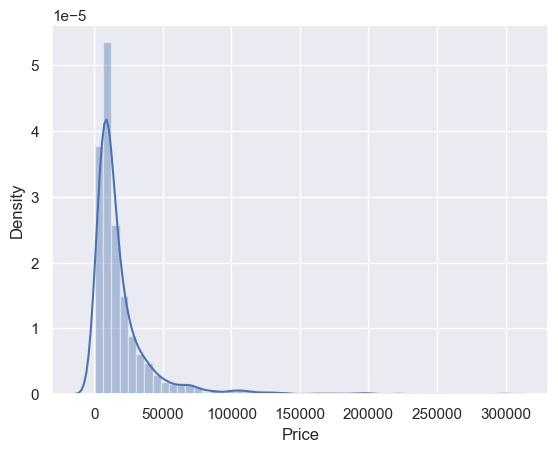

In [409]:
# Plot distribution for 'Price' 

sns.distplot(df['Price'])

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

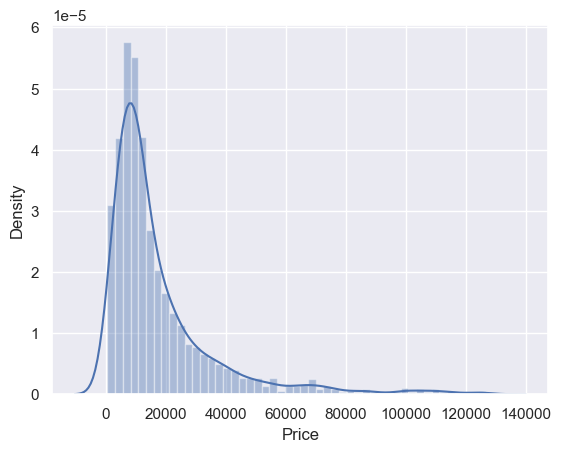

In [410]:
# Remove outliers in the 'Price' variable (top 1% observations)

q = df['Price'].quantile(0.99)
df = df[df['Price']<q]
sns.distplot(df['Price'])

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

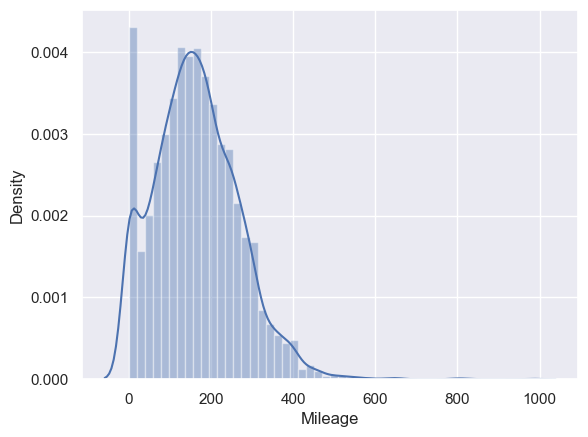

In [411]:
# Plot distribution for 'Mileage' 

sns.distplot(df['Mileage'])

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

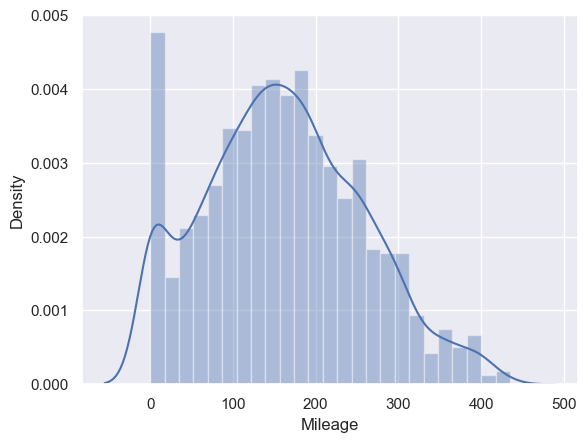

In [412]:
# Remove outliers in the 'Mileage' variable (top 1% observations)

q = df['Mileage'].quantile(0.99)
df = df[df['Mileage']<q]
sns.distplot(df['Mileage'])

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

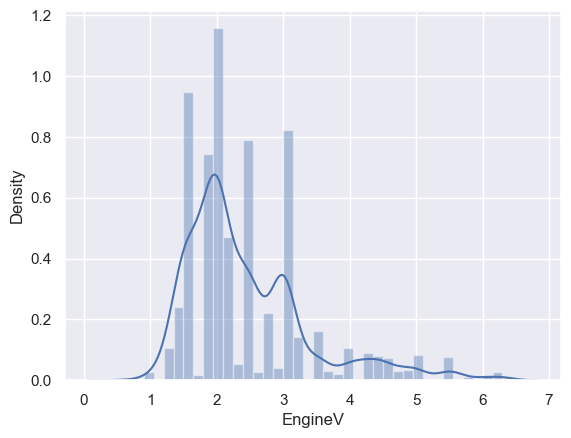

In [413]:
# 'EngineV' has varying values but observations of a vechile engine is limited between (0.6 - 6.5) 

df = df[df['EngineV']<6.5]
sns.distplot(df['EngineV'])

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

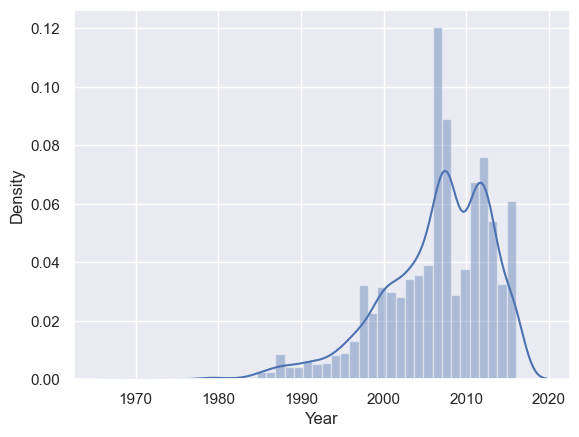

In [414]:
# Plot distribution for 'Year' 

sns.distplot(df['Year'])

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

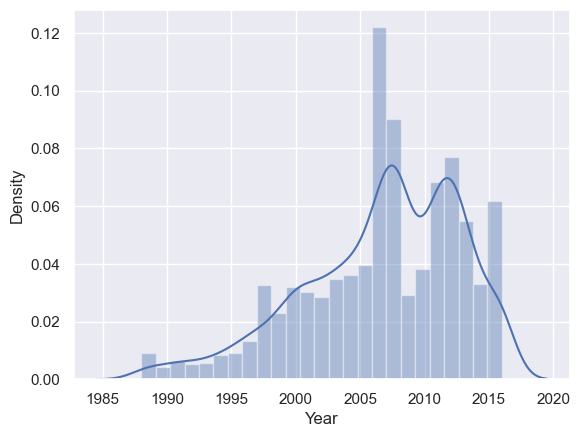

In [415]:
# Remove outliers in the 'Year' variable (bottom 1% observations)

q = df['Year'].quantile(0.01)
df = df[df['Year']>q]
sns.distplot(df['Year'])

In [416]:
# Reset index for the remaining clean data

df = df.reset_index(drop=True)

In [417]:
# Print description of cleaned data

df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


### OLS (ordinary least squares) check
1 - Linearity <br>
2 - No Endogeneity <br>
3 - Normality and Homoscedasticity <br>
4 - No autocorrelation <br>
5 - No multicollinearity <br>

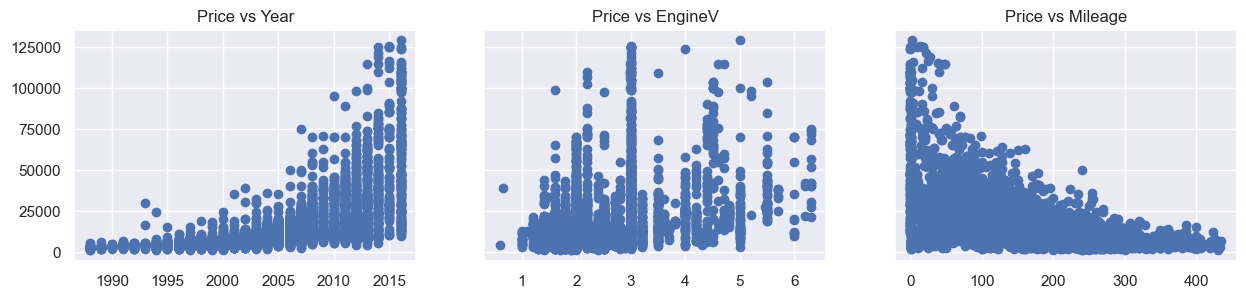

In [418]:
# Check any correlations between variables

f, (ax1,ax2,ax3) = plt.subplots (1,3,sharey=True, figsize=(15,3))
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price vs Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Price vs Mileage')

plt.show()

In [419]:
# Exponential patterns
# This suggests that price is not normally distributed (therefore the relationship with the other variables is not linear)
# Apply log transformation to deal with this issue

log_price = np.log(df['Price'])
df['log_price'] = log_price
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81


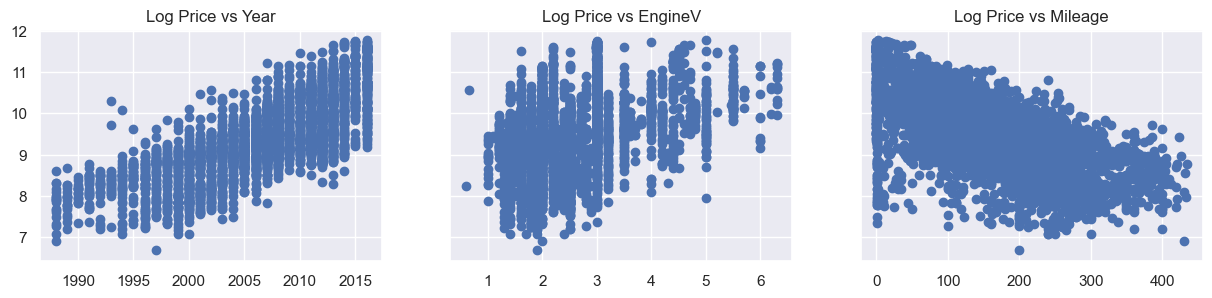

In [420]:
# Check any correlations between the log transformed 'Price' variable

f, (ax1,ax2,ax3) = plt.subplots (1,3,sharey=True, figsize=(15,3))
ax1.scatter(df['Year'],df['log_price'])
ax1.set_title('Log Price vs Year')
ax2.scatter(df['EngineV'],df['log_price'])
ax2.set_title('Log Price vs EngineV')
ax3.scatter(df['Mileage'],df['log_price'])
ax3.set_title('Log Price vs Mileage')

plt.show()

In [421]:
# Linear Patterns
# keep the log transformed price and remove the raw price form our df

df = df.drop(['Price'], axis = 1)

In [422]:
# Linearity has been met with df through sample scatterplot
# df is assumed to have no endogeneity (prohibition of link between the independent variables and the errors) -bias
# Normality is assumed for a big sample per (C.L.T.)
# Zero mean is accomplished through the inclusion of the intercept in the regression
# Homoscedasticity holds because of the application of the log transformation
# No autocorrelation applies because this is not a time series or panel data 

In [423]:
# Check for no multicollinearity with the statsmodels variance inflation factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif['features']=variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [424]:
# VIF = 1: No multicollinearity
# 1 < VIF < 5: Okay
# 5 < VIF : Fine
# 10 <  VIF : Unacceptable

In [425]:
df = df.drop(['Year'],axis=1)
df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
3,Audi,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,9.81


### Utilizing dummy variables for categorical data

In [426]:
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [427]:
# Rearrange dependent and independent variables

df_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [428]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
df_dummies=df_dummies[cols]
df_dummies.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## LINEAR REGRESSION

### Declare variables and transform

In [429]:
y = df_dummies['log_price']
x = df_dummies.drop(['log_price'],axis=1)

In [430]:
# Scale the variables (dummy variables to be scaled as well for ML purposes)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [431]:
x_scaled = scaler.transform(x)

### Train-test split

In [432]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)

### Create regression

In [433]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

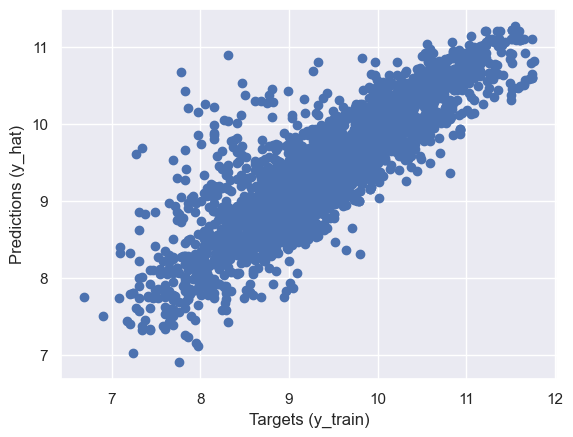

In [434]:
# Plot the predicted value against observed value

y_hat = reg.predict(x_train)

plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

In [435]:
# Since the regression line has an approx. 45 degree angle and passes through (0,0) our model is a pass

C:\Users\kenes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

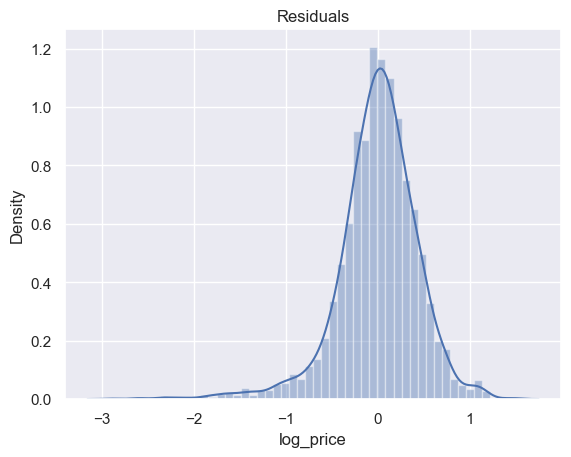

In [436]:
# Residual check - estimate of error
# The difference between the target and the predictions

sns.distplot (y_train - y_hat)
plt.title('Residuals')

In [437]:
# The mean seems to be normal with a mean of 0 but has a longer tail on the negative side
# Therefore certain observations for which (y_train - y_hat) is much lower than the mean 
# The prediction tend to overestimate the target

In [438]:
# Check for R-squared (variability)

reg.score(x_train,y_train)

0.744996578792662

In [439]:
# About 75% variability of our data - relatively acceptable

### Weights and bias

In [440]:
# Intercept

reg.intercept_

9.415239458021299

In [441]:
#  Coefficients in order

reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [442]:
# Summary 

reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


In [443]:
# Positive coefficients - as a feature increases in value so does the log_price (EngineV)
# Negative coefficients - as a feature increases in value the log_price decreases (Mileage)

In [444]:
df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [445]:
# With dummy variables and their interpretation, Audi for example was the brand dropped from the 'Brand' -->
# When all other dummies are 0, Audi is 1. Meaning we have Audi as the benchmark

# Hence a positive dummy coefficient means that the respective category 'Brand' is more expensive than Audi (the benchmark)
# A negative dummy coefficient means that the respective category 'Brand' is less expensive than Audi (the benchmark)

# In addition, the bigger the coefficient the bigger the impact on the log_price

# Only compare dummies with a benchmark dummies and NEVER with a continuous variable

### TESTING

In [446]:
# Find the predictions

y_hat_test = reg.predict(x_test)

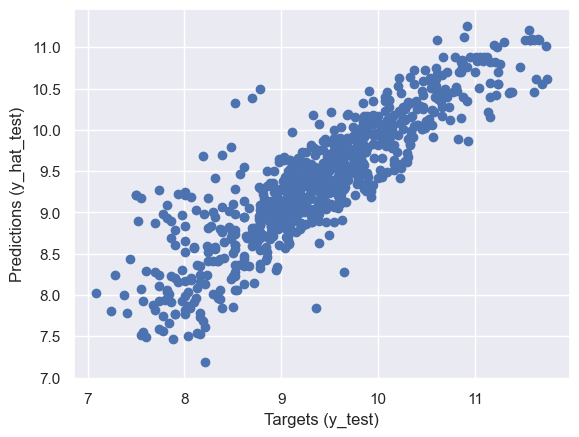

In [447]:
# Plot the predicted value against observed value

plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.show()

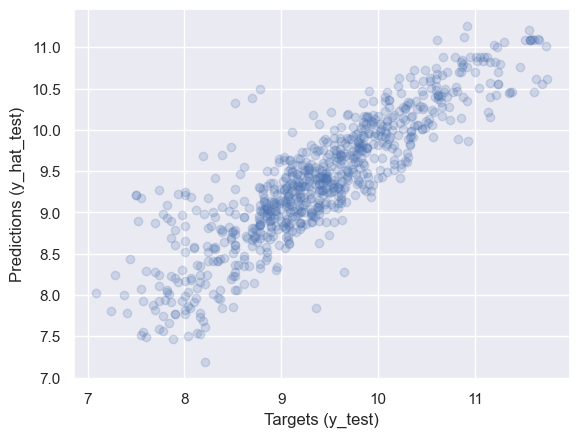

In [448]:
# This graph suggests that our model is good at predicting higher values 
# Use the proportional opacity of the points (alpha bn (0-1))

plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.show()

In [449]:
# The higher the saturation the more concentrated the points

# Check how good our predictions are

df_performance = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_performance.head()

,Prediction
0,9.28
1,8.16
2,8.93
3,8.92
4,9.34


In [450]:
# Convert log_price into 'Price' 
# Take the exponential of our log_price

y_hat_test = np.exp(y_hat_test)

df_performance = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_performance.head()

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [451]:
df_performance ['Target'] = np.exp(y_test)

In [452]:
# Values are missing and spread becasue index has not be reset (original index was preserved)

y_test.head()

1192   7.74
3360   7.94
2350   7.82
3257   8.76
892    9.12
Name: log_price, dtype: float64

In [453]:
# To reset this 

y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [454]:
df_performance ['Target'] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00


In [455]:
df_performance['Residual'] = df_performance['Target']-df_performance['Prediction']

# This is important to lower our SSE because when we do this we are practically SSE=SST-SSR
# Examining the residual is examining the heart of the algorithm

# Measure the difference in % to make it easy to evaluate the output and the target

df_performance['Difference%']=np.absolute(df_performance['Residual']/df_performance['Target']*100)
df_performance.head()

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08


In [456]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15946.76,18165.82,2219.06,36.26
std,13133.20,19967.86,10871.22,55.07
min,1320.56,1200.00,-29456.50,0.06
25%,7413.64,6900.00,-2044.19,12.11
50%,11568.17,11600.00,142.52,23.47
75%,20162.41,20500.00,3147.34,39.56
max,77403.06,126000.00,85106.16,512.69


In [457]:
# Manual check after sorting

df_performance.sort_values(by=['Difference%'])
df_performance.head()

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08


In [458]:
# Show preview all data

pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x )
df_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


### CONCLUSION
- The observed prices are extremely low for the highest 'Difference%' <br><br>
- The residuals of the lowest price cars are negative. This means the predictions are higher than the targets <br><br>
- This might be due to missing a variable which drives the price of used car lower <br><br>
- It also might mean that the used cars might have been damaged <br><br>
- In general the model is pretty good at predicting the price of used cars <br><br>

### SUGGESTION

__To improve our model:__ <br>
- Use a different set of variables: In addition to Brand, Body, Mileage, EngineV, Engine Type, Registration, Year, and Model, we can explore other variables that may have a significant impact on car prices.   <br><br>
- Remove a larger proportion of outliers: Outliers can significantly impact the performance of the regression model. By identifying and removing a larger proportion of outliers from the dataset, we can reduce their influence on the model's predictions.  <br><br>
- Employ different kind of transformations <br><br>
- Check the variables and their respective p-values using the OLS summary from statsmodels: The p-values of the variables in the regression model can provide insights into their statistical significance. <br><br>